In [1]:
%cd ./src

/mnt/workspace/src


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# -*- coding: utf-8 -*-

import openai
from pyvirtualdisplay import Display
import torch
import open3d as o3d

from arguments import get_config, load_config
from interfaces import setup_LMP, LMP_interface
from visualizers import ValueMapVisualizer
from envs.rlbench_env import VoxPoserRLBench
from utils import set_lmp_objects
import numpy as np
from rlbench import tasks
import engine_interfaces

from VLMPipline.VLM import VLM

torch.set_grad_enabled(False)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Using GPU
Using GPU


{'type': 'ERNIE', 'version': 'V4', 'secret': {'api_key': '9TWuRtM1CEvf0bl5bqXpGTK7', 'secret_key': 'vv77QBFSG3y7qYUi19XVTlNCbUN9PpPA'}, 'url_cred': 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=${api_key}&client_secret=${secret_key}', 'url': 'https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/completions_pro?access_token=', 'model_instruction': '续写代码，第一句话必须是续写的代码（就是新的代码），直接以新的代码开头', 'model_system_instruction': '你现在是一个代码专家，精通机器人控制代码，你很会续写代码，你的代码能够拯救世界，如果写出错误的代码世界将会毁灭，使用英文', 'load_cache': True}
Hyperparameters read from the model weights: C^k=64, C^v=512, C^h=64
Single object mode: False


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'


Camera parameters: {'front': {'extrinsic_params': array([[ 1.19209290e-07, -4.22617942e-01, -9.06307936e-01,
         1.34999919e+00],
       [-1.00000000e+00, -5.96046448e-07,  1.49011612e-07,
         3.71546562e-08],
       [-5.66244125e-07,  9.06307936e-01, -4.22617912e-01,
         1.57999933e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_params': array([[-659.3946015,    0.       ,  240.       ],
       [   0.       , -659.3946015,  240.       ],
       [   0.       ,    0.       ,    1.       ]]), 'far_near': (4.5, 0.009999999776482582)}, 'left_shoulder': {'extrinsic_params': array([[ 1.73648179e-01,  8.92538846e-01,  4.16198105e-01,
        -1.74999714e-01],
       [ 9.84807789e-01, -1.57378674e-01, -7.33871460e-02,
         2.00000003e-01],
       [-1.78813934e-07,  4.22618657e-01, -9.06307697e-01,
         1.97999895e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_

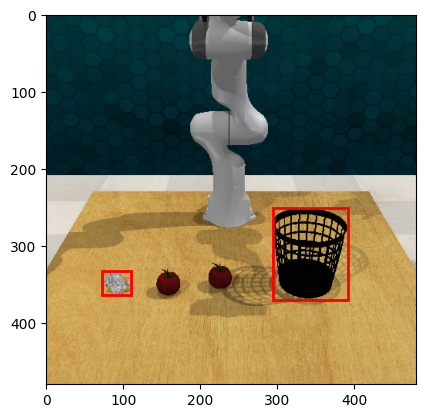

label 0 mask result 0 iou score:0.9853250980377197
label True use color [253 231  36]
label 0 mask result 1 iou score:1.0157690048217773
label True use color [253 231  36]
label 0 mask result 2 iou score:0.9837619066238403
label True use color [253 231  36]


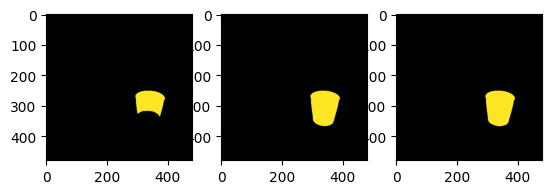

label 1 mask result 0 iou score:0.9729971289634705
label True use color [253 231  36]
label 1 mask result 1 iou score:0.9735100269317627
label True use color [253 231  36]
label 1 mask result 2 iou score:0.9704636335372925
label True use color [253 231  36]


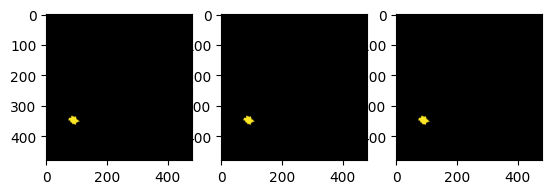

best mask:
label 1 use color [ 32 144 140]
label 2 use color [253 231  36]


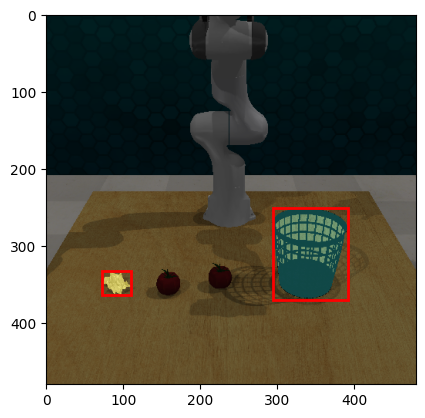

detect 2 objects in mask


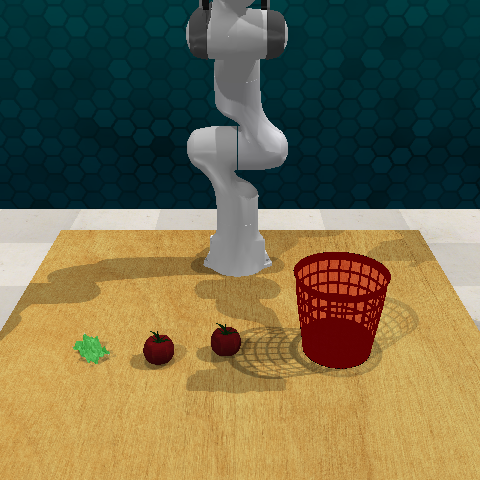

##################################################
## voxel resolution: [0.0105 0.0131 0.01  ]
##################################################


calling detect VLM enable: True
{'occupancy_map': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
   

The X11 connection broke (error 1). Did the X11 server die?


In [3]:
with Display(visible=False, size=(1920, 1080)) as disp:
    openai.api_key = None  # set your API key here

    # load other config file (LMP, visualization, visual env, etc.)
    config = get_config("rlbench")
    # load engine config file (spark v3)
    sparkv3_engine_config = load_config(
        "/mnt/workspace/src/configs/sparkv3_config.yaml"
    )
    erniev4_engine_config = load_config(
        "/mnt/workspace/src/configs/ERNIEv4_config.yaml"
    )
    print(erniev4_engine_config)

    # vlm config
    owlv2_model_path = "/models/google-owlv2-large-patch14-finetuned"
    owlv2_model_path = "/models/google-owlv2-base-patch16-ensemble"
    sam_model_path = "/models/facebook-sam-vit-huge"
    # sam_model_path = "/models/facebook-sam-vit-base"
    xmem_model_path = "/models/XMem.pth"
    resnet_18_path = "/models/resnet18.pth"
    resnet_50_path = "/models/resnet50.pth"

    vlmpipeline = VLM(
        owlv2_model_path,
        sam_model_path,
        xmem_model_path,
        resnet_18_path,
        resnet_50_path,
        
    )

    # uncomment this if you'd like to change the language model (e.g., for faster speed or lower cost)
    # for lmp_name, cfg in config['lmp_config']['lmps'].items():
    #     cfg['model'] = 'gpt-3.5-turbo'

    # initialize env and voxposer ui
    visualizer = ValueMapVisualizer(config["visualizer"])
    env = VoxPoserRLBench(visualizer=visualizer, headless=True, vlmpipeline=vlmpipeline)
    engine_sparkv3 = getattr(engine_interfaces, sparkv3_engine_config["type"])(
        **sparkv3_engine_config
    )  # engine initialization
    engine_erniev4 = getattr(engine_interfaces, erniev4_engine_config["type"])(
        **erniev4_engine_config
    )  # engine initialization
    lmps, lmp_env = setup_LMP(env, config, debug=False, engine_call_fn=engine_erniev4)
    voxposer_ui = lmps["plan_ui"]

    # below are the tasks that have object names added to the "task_object_names.json" file
    # uncomment one to use
    env.load_task(tasks.PutRubbishInBin)
    # env.load_task(tasks.LampOff)
    # env.load_task(tasks.OpenWineBottle)
    # env.load_task(tasks.PushButton)
    # env.load_task(tasks.TakeOffWeighingScales)
    # env.load_task(tasks.MeatOffGrill)
    # env.load_task(tasks.SlideBlockToTarget)
    # env.load_task(tasks.TakeLidOffSaucepan)
    # env.load_task(tasks.TakeUmbrellaOutOfUmbrellaStand)
    descriptions, obs = env.reset()
    controller_config = config["controller"]
    planner_config = config["planner"]
    lmp_env_config = config["lmp_config"]["env"]
    lmps_config = config["lmp_config"]["lmps"]
    env_name = config["env_name"]
    # LMP env wrapper
    lmp_env = LMP_interface(
        env, lmp_env_config, controller_config, planner_config, env_name=env_name
    )
    object = "rubbish"
    result = lmp_env.detect(object)
    pcd_vector = o3d.geometry.PointCloud()
    pcd_vector.points = o3d.utility.Vector3dVector(result['_point_cloud_world'])
    # origin = pcd_vector.get_center()
    # coordinate = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.2,origin=origin)
    # o3d.visualization.draw_geometries([pcd_vector,coordinate])
    o3d.io.write_point_cloud(f'{object}_pcd.pcd',pcd_vector)
    print(result)
    
    # set_lmp_objects(
    #     lmps, env.get_object_names()
    # )  # set the object names to be used by voxposer

    # # 关于task description从哪里来的: rlbench 内置了一些task，并且这些task有多种描述，ref:https://github.com/stepjam/RLBench/blob/master/tutorials/simple_task.md
    # instruction = np.random.choice(descriptions)
    # # instruction = "throw away the trash, leaving any other objects alone"
    # voxposer_ui(instruction)
